## Eye State Classification (Open/Closed Eyes)
---
Project breakdown:
1. Data Preparation
2. Model Definition (ANN & CNN)
3. Model Training
4. Model Evaluation (ANN vs CNN)

Dataset used: MRL Eye Dataset  
Kaggle link: https://www.kaggle.com/datasets/akashshingha850/mrl-eye-dataset?resource=download  
Used data: Awake (25,770), Sleepy (25,167)

### 1. Data Preparation

In [3]:
import os
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
DATASET_PATH = "dataset"  
categories   = ["sleepy", "awake"]
IMG_SIZE     = 64              

In [3]:
def load_images(dataset_path, categories, img_size):
    """
    Load images from dataset, preprocess them, and return arrays.
    
    Args:
        dataset_path (str): Path to the dataset folder
        categories (list) : List of category names
        img_size (int)    : Target size for resizing images (img_size x img_size)
        
    Returns:
        X (np.array): Preprocessed image data
        y (np.array): Labels
    """
    X = []
    y = []

    for label, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)

            # Read image with OpenCV
            img = cv2.imread(img_path)
            if img is None:
                continue  

            # Convert to grayscale
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize image
            img = cv2.resize(img, (img_size, img_size))

            # Normalize
            img = img.astype("float32") / 255.0

            # Add to dataset
            X.append(img)
            y.append(label)

    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Add channel dimension for grayscale images
    X = X.reshape(-1, img_size, img_size, 1)
    
    return X, y

In [4]:
X, y = load_images(DATASET_PATH, categories, IMG_SIZE)

In [5]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (50937, 64, 64, 1)
y shape: (50937,)


In [6]:
unique, counts = np.unique(y, return_counts=True)
class_names    = {0: "sleepy", 1: "awake"}

for label, count in zip(unique, counts):
    print(f"Class {label} ({class_names[label]}): {count} images")


Class 0 (sleepy): 25167 images
Class 1 (awake): 25770 images


In [7]:
X[:2]

array([[[[0.34901962],
         [0.34901962],
         [0.34901962],
         ...,
         [0.2       ],
         [0.2       ],
         [0.2       ]],

        [[0.35686275],
         [0.34901962],
         [0.34901962],
         ...,
         [0.2       ],
         [0.19607843],
         [0.19607843]],

        [[0.3529412 ],
         [0.34509805],
         [0.3529412 ],
         ...,
         [0.20784314],
         [0.2       ],
         [0.19607843]],

        ...,

        [[0.25490198],
         [0.2509804 ],
         [0.24705882],
         ...,
         [0.25882354],
         [0.25490198],
         [0.2509804 ]],

        [[0.2627451 ],
         [0.2509804 ],
         [0.24705882],
         ...,
         [0.2509804 ],
         [0.25490198],
         [0.24705882]],

        [[0.2627451 ],
         [0.2509804 ],
         [0.24705882],
         ...,
         [0.25490198],
         [0.24705882],
         [0.24705882]]],


       [[[0.18039216],
         [0.19215687],
         [0.19

In [8]:
y[:2]

array([0, 0])

In [9]:
def show_dataset_image(X, y, index):
    plt.figure(figsize=(10, 2))
    plt.imshow(X[index], cmap='gray')
    plt.title(categories[y[index]])
    plt.show()

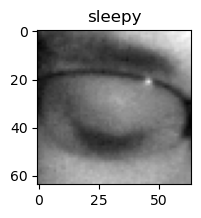

In [10]:
show_dataset_image(X, y, 888)

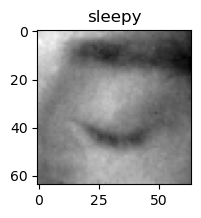

In [11]:
show_dataset_image(X, y, 2)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [13]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (40749, 64, 64, 1)
y_train shape: (40749,)


In [14]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (10188, 64, 64, 1)
y_test shape: (10188,)


### 2. Model Definition (ANN & CNN)

In [15]:
ann = models.Sequential([
    layers.Input(shape=(64,64,1)),
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

In [16]:
cnn = models.Sequential([
    layers.Input(shape=(64, 64, 1)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(75, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

### 3. Model Training

In [17]:
ann.compile(optimizer='adam',
            loss='binary_crossentropy', 
            metrics=['accuracy'])

In [18]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1274/1274 ━━━━━━━━━━━━━━━━━━━━ 255s 197ms/step - accuracy: 0.8561 - loss: 0.3801
Epoch 2/5
1274/1274 ━━━━━━━━━━━━━━━━━━━━ 251s 197ms/step - accuracy: 0.8862 - loss: 0.2976
Epoch 3/5
1274/1274 ━━━━━━━━━━━━━━━━━━━━ 252s 197ms/step - accuracy: 0.9010 - loss: 0.2614
Epoch 4/5
1274/1274 ━━━━━━━━━━━━━━━━━━━━ 251s 197ms/step - accuracy: 0.9053 - loss: 0.2485
Epoch 5/5
1274/1274 ━━━━━━━━━━━━━━━━━━━━ 254s 199ms/step - accuracy: 0.9077 - loss: 0.2385


In [19]:
cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1274/1274 ━━━━━━━━━━━━━━━━━━━━ 87s 62ms/step - accuracy: 0.9126 - loss: 0.2185 
Epoch 2/5
1274/1274 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.9566 - loss: 0.1242 
Epoch 3/5
1274/1274 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.9670 - loss: 0.0941 
Epoch 4/5
1274/1274 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.9716 - loss: 0.0813 
Epoch 5/5
1274/1274 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.9768 - loss: 0.0679 


### 4. Model Evaluation (ANN vs CNN)

In [21]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluate a binary classification model and plot confusion matrix.
    
    Args:
        model: Trained model (ANN or CNN)
        X_test: Test features
        y_test: Test labels
        model_name: Name of the model (string)
    """
    
    # Predict and convert probabilities to 0/1
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    y_pred = y_pred.reshape(-1,)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}")
    
    # Classification report
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
ANN Accuracy: 0.9180
ANN Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      5037
           1       0.92      0.91      0.92      5151

    accuracy                           0.92     10188
   macro avg       0.92      0.92      0.92     10188
weighted avg       0.92      0.92      0.92     10188



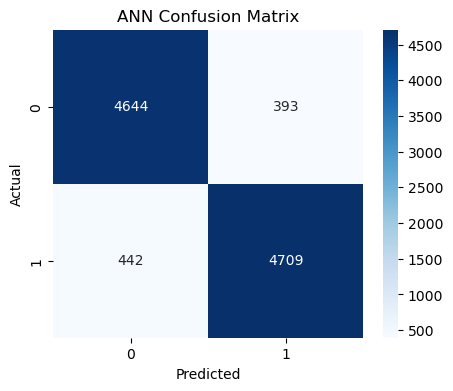

In [22]:
evaluate_model(ann, X_test, y_test, model_name="ANN")

319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
CNN Accuracy: 0.9760
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      5037
           1       0.98      0.97      0.98      5151

    accuracy                           0.98     10188
   macro avg       0.98      0.98      0.98     10188
weighted avg       0.98      0.98      0.98     10188



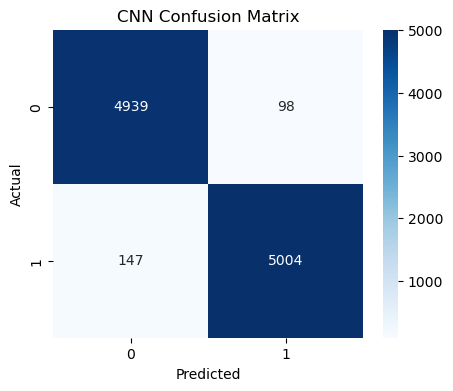

In [23]:
evaluate_model(cnn, X_test, y_test, model_name="CNN")

<p style="color:green;">
    Evaluation results indicate that CNN &gt; ANN in terms of accuracy.
</p>

#### Testing on unseen images

In [45]:
img = cv2.imread("open_close.jpg")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [46]:
def plot_image(image):
    plt.figure(figsize=(12, 3))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

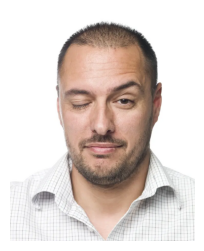

In [47]:
plot_image(img_rgb)

In [48]:
# Load the cascades for left and right eyes
left_eye_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_lefteye_2splits.xml")
right_eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_righteye_2splits.xml")

# Detect eyes
left_eyes  = left_eye_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5)
right_eyes = right_eye_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5)

# Crop eyes and draw rectangles
eye_crops = []

# Left eye
if len(left_eyes) > 0:
    x, y, w, h = left_eyes[0]
    eye_crop   = cv2.cvtColor(img[y:y+h, x:x+w], cv2.COLOR_BGR2RGB)
    eye_crops.append(eye_crop)
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Blue for left eye

# Right eye
if len(right_eyes) > 0:
    x, y, w, h = right_eyes[0]
    eye_crop   = cv2.cvtColor(img[y:y+h, x:x+w], cv2.COLOR_BGR2RGB)
    eye_crops.append(eye_crop)
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green for right eye

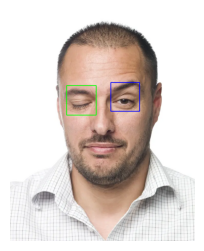

In [49]:
plot_image(img_rgb)

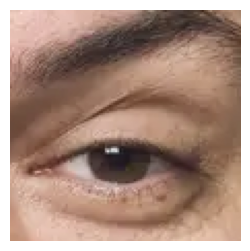

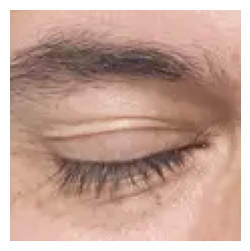

In [50]:
for crop in eye_crops:
    plot_image(crop)

In [51]:
processed_eyes = [] 

for crop in eye_crops:   
    # Convert to grayscale
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

    # Resize the image
    resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))

    # Normalize to range 0–1
    normalized = resized / 255.0

    # Add channel dimension (64,64) → (64,64,1)
    normalized = np.expand_dims(normalized, axis=-1)

    # Add to the list
    processed_eyes.append(normalized)

# Convert to final numpy array → ready for prediction
X = np.array(processed_eyes, dtype=np.float32)
print(X.shape)

(2, 64, 64, 1)


In [53]:
predictions = cnn.predict(X)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


array([[1.000000e+00],
       [8.015013e-06]], dtype=float32)

#### Model Saving

In [124]:
cnn.save("eye_state_model.keras")

#### Real-Time Drowsiness Detection

In [73]:
import cv2
import numpy as np
import time
from tensorflow.keras.models import load_model
import winsound

# Parameters
IMG_SIZE        = 64
ALERT_THRESHOLD = 3
MODEL_PATH      = "eye_state_model.keras"

# Load model and Haar cascades
model = load_model(MODEL_PATH)
left_eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_lefteye_2splits.xml")
right_eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_righteye_2splits.xml")

cap = cv2.VideoCapture(0)
closed_start_time = None

def predict_eye(gray_eye):
    eye = cv2.resize(gray_eye, (IMG_SIZE, IMG_SIZE)) / 255.0
    eye = np.expand_dims(eye, axis=(0, -1))
    pred = model.predict(eye, verbose=0)[0][0]
    return "Closed" if pred < 0.5 else "Open"

def process_eye(cascade, gray, frame):
    eyes = cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=7, minSize=(30, 30))
    if len(eyes) == 0:
        return 1
    x, y, w, h = eyes[0]
    state = predict_eye(gray[y:y+h, x:x+w])
    color = (0, 255, 0) if state == "Open" else (0, 0, 255)
    cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
    cv2.putText(frame, state, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    return 1 if state == "Closed" else 0

while True:
    ret, frame = cap.read()
    if not ret:
        print("Camera error")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes_closed = process_eye(left_eye_cascade, gray, frame) + process_eye(right_eye_cascade, gray, frame)

    if eyes_closed >= 2:
        if closed_start_time is None:
            closed_start_time = time.time()
        elapsed = time.time() - closed_start_time
        progress = min(elapsed / ALERT_THRESHOLD, 1)
        cv2.rectangle(frame, (50, 50), (350, 80), (255, 255, 255), 2)
        cv2.rectangle(frame, (50, 50), (50 + int(progress * 300), 80), (0, 0, 255), -1)
        cv2.putText(frame, f"Eyes closed / not detected: {elapsed:.1f}s", (50, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        if elapsed >= ALERT_THRESHOLD:
            cv2.putText(frame, "DROWSINESS ALERT", (80, 200), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)
            winsound.Beep(1000, 800)
    else:
        closed_start_time = None
        cv2.rectangle(frame, (50, 50), (350, 80), (255, 255, 255), 2)
        cv2.putText(frame, "Eyes open", (50, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2.imshow("Drowsiness Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()